## Decision Tree regression - household power consumption

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

Import the CSV Data as Pandas DataFrame

## 2) Data Collection.

In [80]:
import pandas as pd
data=pd.read_csv(r"household_power_consumption.csv")

In [81]:
# Take the sample of 10000 rows from the data

In [82]:
data = data.sample(10000)

In [83]:
data.shape

(10000, 9)

In [84]:
# Show Top 5 Records

In [85]:
data.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1289399,30/5/2009,03:23:00,0.388,0.000,242.750,1.600,0.000,0.000,1.0
497939,27/11/2007,12:23:00,4.448,0.436,235.240,19.200,0.000,34.000,17.0
1193118,24/3/2009,06:42:00,4.120,0.068,243.720,17.800,0.000,0.000,19.0
1157209,27/2/2009,08:13:00,1.532,0.298,241.250,6.400,0.000,1.000,18.0
1554771,30/11/2009,10:15:00,0.344,0.000,242.850,1.600,0.000,0.000,0.0


In [86]:
# Summary of the dataset

In [87]:
# Display summary statistics for a dataframe
data.describe()

,Sub_metering_3
count,9867.000000
mean,6.433060
std,8.417741
min,0.000000
25%,0.000000
50%,1.000000
75%,17.000000
max,30.000000


In [88]:
# Check Null and Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1289399 to 1202557
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   10000 non-null  object 
 1   Time                   10000 non-null  object 
 2   Global_active_power    10000 non-null  object 
 3   Global_reactive_power  10000 non-null  object 
 4   Voltage                10000 non-null  object 
 5   Global_intensity       10000 non-null  object 
 6   Sub_metering_1         10000 non-null  object 
 7   Sub_metering_2         10000 non-null  object 
 8   Sub_metering_3         9867 non-null   float64
dtypes: float64(1), object(8)
memory usage: 781.2+ KB


# 3. EXPLORING DATA

In [89]:
# drop all na, nan, null values

In [90]:
data = data.dropna()

In [91]:
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [113]:
# drop all duplicates

In [114]:
data.duplicated().sum()

7

In [115]:
data.drop_duplicates()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,sub_meter_total
1289399,0.388,0.000,242.75,1.6,1.0
497939,4.448,0.436,235.24,19.2,51.0
1193118,4.120,0.068,243.72,17.8,19.0
1157209,1.532,0.298,241.25,6.4,19.0
1554771,0.344,0.000,242.85,1.6,0.0
...,...,...,...,...,...
1887657,0.250,0.000,242.31,1.0,1.0
126006,0.304,0.000,242.93,1.4,0.0
911815,0.698,0.066,244.24,2.8,1.0
1878669,1.914,0.068,237.21,8.4,18.0


In [92]:
data.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [93]:
# change datatype of all columns to float

In [96]:
data = data.astype({'Global_active_power':float,'Global_reactive_power':float,'Voltage':float,'Global_intensity':float,'Sub_metering_1':float,'Sub_metering_2':float,'Sub_metering_3':float})

In [97]:
# check datatype of all columns

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9867 entries, 1289399 to 1202557
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   9867 non-null   object 
 1   Time                   9867 non-null   object 
 2   Global_active_power    9867 non-null   float64
 3   Global_reactive_power  9867 non-null   float64
 4   Voltage                9867 non-null   float64
 5   Global_intensity       9867 non-null   float64
 6   Sub_metering_1         9867 non-null   float64
 7   Sub_metering_2         9867 non-null   float64
 8   Sub_metering_3         9867 non-null   float64
dtypes: float64(7), object(2)
memory usage: 770.9+ KB


In [99]:
# create a column 'sub_meter_total' which is the sum of Sub_metering_1,Sub_metering_2,Sub_metering_3

In [100]:
data["sub_meter_total"] = data["Sub_metering_1"].astype(float)+data["Sub_metering_2"].astype(float)+data["Sub_metering_3"].astype(float)

In [101]:
data.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_meter_total
1289399,30/5/2009,03:23:00,0.388,0.000,242.75,1.6,0.0,0.0,1.0,1.0
497939,27/11/2007,12:23:00,4.448,0.436,235.24,19.2,0.0,34.0,17.0,51.0
1193118,24/3/2009,06:42:00,4.120,0.068,243.72,17.8,0.0,0.0,19.0,19.0
1157209,27/2/2009,08:13:00,1.532,0.298,241.25,6.4,0.0,1.0,18.0,19.0
1554771,30/11/2009,10:15:00,0.344,0.000,242.85,1.6,0.0,0.0,0.0,0.0


In [161]:
# drop columns which are not required

In [102]:
data.drop(columns=['Date','Time','Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1,inplace=True)

In [103]:
data.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,sub_meter_total
1289399,0.388,0.000,242.75,1.6,1.0
497939,4.448,0.436,235.24,19.2,51.0
1193118,4.120,0.068,243.72,17.8,19.0
1157209,1.532,0.298,241.25,6.4,19.0
1554771,0.344,0.000,242.85,1.6,0.0


In [162]:
# check unique values of all the columns

In [104]:
data['Global_active_power'].unique()

array([0.388, 4.448, 4.12 , ..., 3.092, 3.826, 2.788])

In [24]:
data['Global_reactive_power'].unique()

array(['0.084', '0.278', '0.056', '0.204', '0.000', '0.250', '0.146',
       '0.116', '0.444', '0.138', '0.484', '0.350', '0.192', '0.266',
       '0.100', '0.106', '0.086', '0.052', '0.046', '0.068', '0.320',
       '0.062', '0.222', '0.092', '0.234', '0.558', '0.240', '0.328',
       '0.094', '0.188', '0.290', '0.064', '0.080', '0.564', '0.296',
       '0.124', '0.214', '0.162', '0.090', '0.126', '0.258', '0.268',
       '0.194', '0.286', '0.170', '0.246', '0.208', '0.248', '0.160',
       0.076, '0.198', '0.218', '0.432', '0.072', '0.230', '0.264',
       '0.144', '0.220', '0.102', '0.244', '0.206', '0.140', '0.152',
       '0.048', '0.058', '0.128', '0.212', 0.12, '0.232', '0.196',
       '0.098', '0.180', '0.228', '0.190', '0.076', '0.238', '0.216',
       0.18, '0.082', '0.120', '0.154', '0.054', '0.136', '0.304',
       '0.422', 0.098, 0.066, '0.142', 0.0, '0.060', '0.156', '0.178',
       '0.174', '0.402', '0.172', '0.110', '0.276', '0.242', '0.108',
       '0.312', '0.364', '0

In [105]:
data['Voltage'].unique()

array([242.75, 235.24, 243.72, ..., 246.49, 247.64, 235.58])

In [106]:
data['Global_intensity'].unique()

array([ 1.6, 19.2, 17.8,  6.4,  2.4,  1.2,  6. ,  8.2,  1. ,  6.6,  0.6,
        5.8,  4.4,  5.2,  4. ,  6.8,  0.8,  9.6,  2. , 10.4,  1.8,  5.6,
        8. ,  2.2,  1.4,  9.4,  3.6,  7.2, 10.2,  4.8, 21.2,  3.4, 14.2,
       13. ,  8.4,  2.6, 25. , 15.4, 11.8,  5.4,  2.8,  7. ,  6.2, 13.2,
       16.8,  3. ,  7.4,  9. ,  9.2, 15. ,  9.8,  4.6, 14.6,  5. , 17.2,
       10. ,  7.6,  7.8, 10.8, 20.6, 19.6, 21.6, 17.4, 14.4,  0.2,  0.4,
       13.4,  8.8, 19.8, 16.2,  4.2, 15.6,  3.8,  8.6, 11.4, 10.6, 15.8,
       24.8, 13.8, 18.6, 11. , 15.2, 11.6, 12.4,  3.2, 24.2, 26. , 20.8,
       17.6, 12.6, 11.2, 20.2, 16.4, 21.4, 12. , 18.2, 13.6, 12.2, 14. ,
       25.4, 14.8, 19.4, 16. , 26.6, 30.8, 26.2, 12.8, 22.8, 16.6, 18. ,
       20. , 23.8, 18.4, 24.6, 17. , 22. , 25.8, 19. , 28.2, 26.4, 18.8,
       29.8, 20.4, 28.6, 24. , 27.8, 21.8, 23.2, 27.2, 21. , 23.4, 22.6,
       24.4, 35. , 25.2, 31.4, 23. , 27.6])

In [107]:
data['sub_meter_total'].unique()

array([  1.,  51.,  19.,   0.,  18.,  12.,   2.,  29.,  30.,  56.,  50.,
        54.,  57.,   3.,  21.,  17.,  13.,  44.,  55.,  20.,  40.,  22.,
        39.,  24.,  37.,  53.,  38.,  58.,  23.,  43.,  45.,  10.,   4.,
        28.,  91.,  75.,   5.,   6.,  35.,  31.,  16.,  11.,  41.,   7.,
        46.,  27.,  89.,  60.,  49.,  33.,  48.,  36.,  78.,  84.,  62.,
        26.,  61.,  59.,  52.,   9.,   8.,  47.,  69.,  90.,  15.,  34.,
        14.,  32.,  85.,  25.,  42.,  74.,  71.,  65.,  79.,  68., 108.,
        83.,  70.,  88.,  73.,  64.,  94.,  72.,  77.])

In [119]:
X = data.drop('sub_meter_total',axis=1)

In [120]:
y = data['sub_meter_total']

## Split the data into Train and Test

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2) 

In [123]:
X_train.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
747179,0.436,0.350,240.51,2.4
1032228,1.468,0.064,241.68,6.0


In [124]:
X_test.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
461009,0.300,0.104,239.88,1.2
876120,0.082,0.000,243.11,0.2


In [125]:
y_train.head(2)

747179      2.0
1032228    18.0
Name: sub_meter_total, dtype: float64

In [126]:
y_test.head(2)

461009    0.0
876120    1.0
Name: sub_meter_total, dtype: float64

## Create a model

In [127]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()

In [129]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [130]:
model.score(X_train,y_train)

0.999998788944286

[Text(0.5, 0.9166666666666666, 'X[0] <= 1.195\nsquared_error = 156.922\nsamples = 7893\nvalue = 8.701'),
 Text(0.25, 0.75, 'X[0] <= 0.817\nsquared_error = 4.955\nsamples = 4666\nvalue = 1.155'),
 Text(0.125, 0.5833333333333334, 'X[1] <= 0.125\nsquared_error = 1.253\nsamples = 4283\nvalue = 0.821'),
 Text(0.0625, 0.4166666666666667, 'X[1] <= 0.057\nsquared_error = 0.774\nsamples = 2780\nvalue = 0.589'),
 Text(0.03125, 0.25, 'X[3] <= 2.7\nsquared_error = 0.519\nsamples = 1356\nvalue = 0.403'),
 Text(0.015625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.046875, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.09375, 0.25, 'X[0] <= 0.808\nsquared_error = 0.953\nsamples = 1424\nvalue = 0.767'),
 Text(0.078125, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.109375, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1875, 0.4166666666666667, 'X[3] <= 2.9\nsquared_error = 1.856\nsamples = 1503\nvalue = 1.249'),
 Text(0.15625, 0.25, 'X[1] <= 0.229\nsquared_error = 0.987\nsamples = 1379\nvalue = 1.

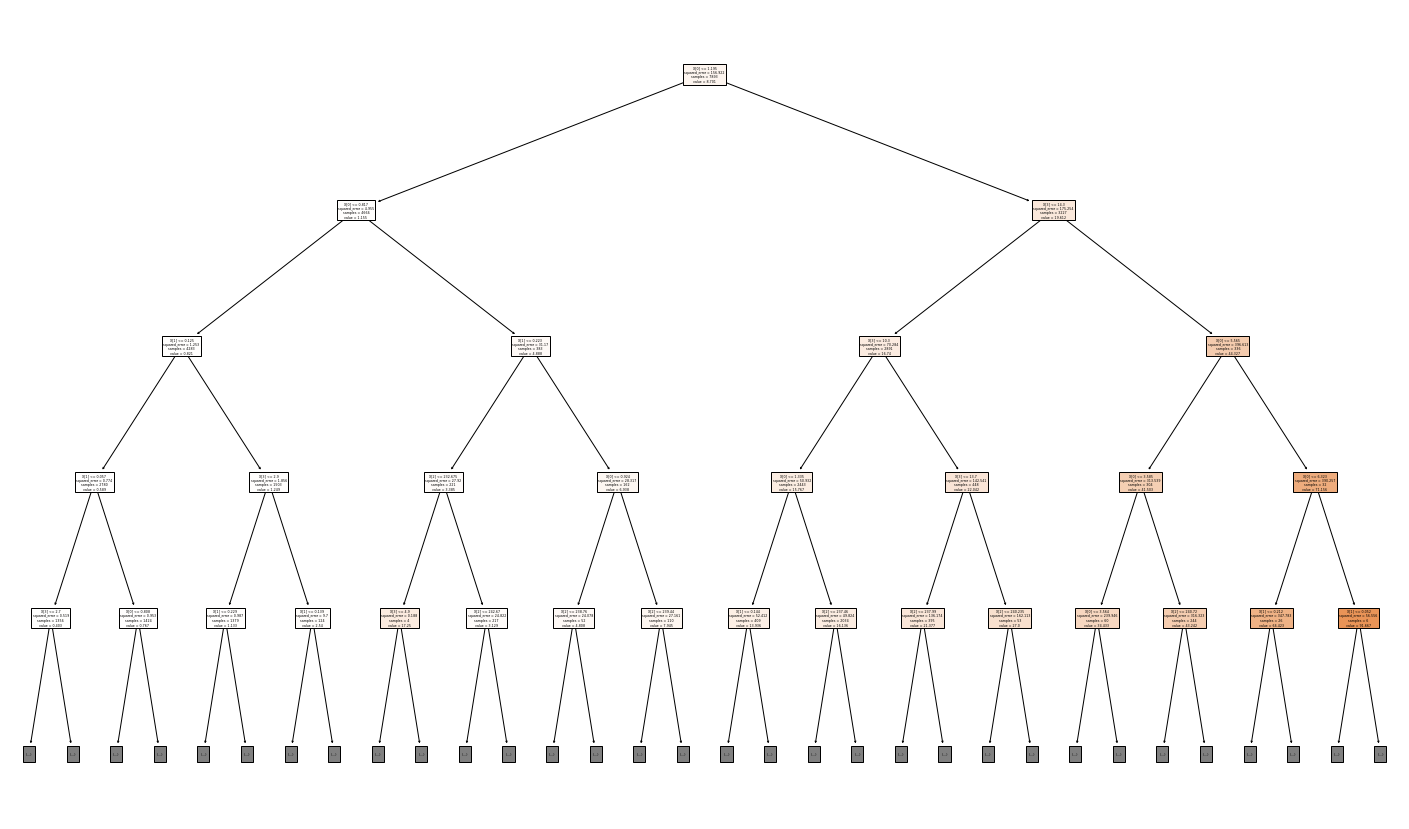

In [131]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model, max_depth=4,filled=True)

In [150]:
y_predict=model.predict(X_test)

In [151]:
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score

In [152]:
accuracy_r2_score = r2_score(y_test,y_predict)

In [153]:
accuracy_r2_score

0.5482898661179851

r2_score is 0.54828 

## Hyper parameter tuning using Grid search CV

In [140]:
grid_param = {
    'criterion': ['squared_error'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

In [141]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=model,param_grid=grid_param,cv=2,verbose=1)

In [142]:
grid_searh.fit(X_train,y_train)

Fitting 2 folds for each of 672 candidates, totalling 1344 fits


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [143]:
grid_searh.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [144]:
model_with_best_params=DecisionTreeRegressor(criterion= 'squared_error',max_depth= 4,min_samples_leaf= 1,min_samples_split= 2,splitter='best')

In [145]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

[Text(0.5, 0.9, 'X[0] <= 1.195\nsquared_error = 156.922\nsamples = 7893\nvalue = 8.701'),
 Text(0.25, 0.7, 'X[0] <= 0.817\nsquared_error = 4.955\nsamples = 4666\nvalue = 1.155'),
 Text(0.125, 0.5, 'X[1] <= 0.125\nsquared_error = 1.253\nsamples = 4283\nvalue = 0.821'),
 Text(0.0625, 0.3, 'X[1] <= 0.057\nsquared_error = 0.774\nsamples = 2780\nvalue = 0.589'),
 Text(0.03125, 0.1, 'squared_error = 0.519\nsamples = 1356\nvalue = 0.403'),
 Text(0.09375, 0.1, 'squared_error = 0.953\nsamples = 1424\nvalue = 0.767'),
 Text(0.1875, 0.3, 'X[3] <= 2.9\nsquared_error = 1.856\nsamples = 1503\nvalue = 1.249'),
 Text(0.15625, 0.1, 'squared_error = 0.987\nsamples = 1379\nvalue = 1.133'),
 Text(0.21875, 0.1, 'squared_error = 9.7\nsamples = 124\nvalue = 2.54'),
 Text(0.375, 0.5, 'X[1] <= 0.223\nsquared_error = 31.17\nsamples = 383\nvalue = 4.888'),
 Text(0.3125, 0.3, 'X[2] <= 232.675\nsquared_error = 27.92\nsamples = 221\nvalue = 3.385'),
 Text(0.28125, 0.1, 'squared_error = 0.188\nsamples = 4\nvalue = 1

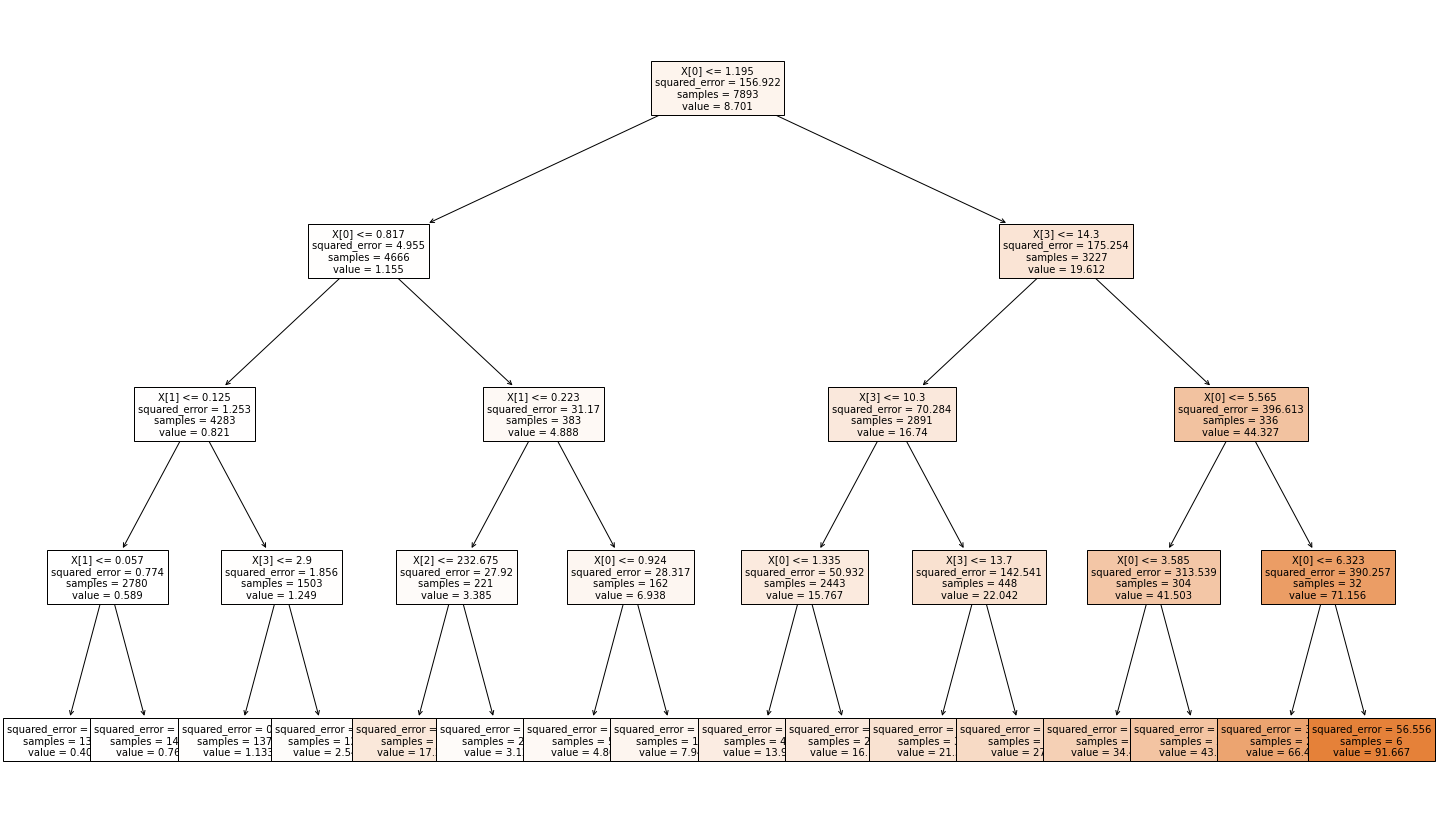

In [146]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [154]:
fig.savefig('Decision tree regression_power_cons.png')

In [156]:
Prediction_hpt=model_with_best_params.predict(X_test)

In [158]:
accuracy_hpt = r2_score(y_test,Prediction_hpt)

In [159]:
accuracy_hpt

0.7570950476495559

accuracy score before hyper parameter tuning was 0.5482898661179851. now it increased to 0.7570950476495559